In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Henon_map_traj(N, beta, x_0):
    xh_1 = np.zeros(N+1)
    xh_2 = np.zeros(N+1)
    for k in range(N):
        xh_1[k+1] = beta - 1.4*xh_1[k]**2 + xh_2[k]
        xh_2[k+1] = 0.3*xh_1[k]
    return xh_1

In [3]:
def Ikeda_map_traj(N, mu, x_0):
    xi_1 = np.zeros(N+1)
    xi_2 = np.ones(N+1)
    m = np.zeros(N)
    for k in range(N):
        m[k] = 0.4 - 6.0/(1 + xi_1[k]**2 + xi_2[k]**2)
        xi_1[k+1] = 1.0 + mu*(xi_1[k]*np.cos(m[k]) - xi_2[k]*np.sin(m[k]) )
        xi_2[k+1] = mu*(xi_1[k]*np.sin(m[k]) + xi_2[k]*np.cos(m[k]))
    return xi_1

In [4]:
def Sin_map_traj(N, T):
    x = np.zeros(N+1)
    for k in range(N+1):
        x[k] = np.sin(2*np.pi*k/T)
    return x

In [5]:
N = 500
beta_list = [0.8, 1.0]
mu_list = [0.7, 0.9]
T_list = [20, 80]
x_0 = 0.6

train_traj = np.zeros((6, N+1))
train_traj[0, :] = Henon_map_traj(N, beta_list[0], x_0)
train_traj[1, :] = Henon_map_traj(N, beta_list[1], x_0)
train_traj[2, :] = Ikeda_map_traj(N, mu_list[0], x_0)
train_traj[3, :] = Ikeda_map_traj(N, mu_list[1], x_0)
train_traj[4, :] = Sin_map_traj(N, T_list[0])
train_traj[5, :] = Sin_map_traj(N, T_list[1])

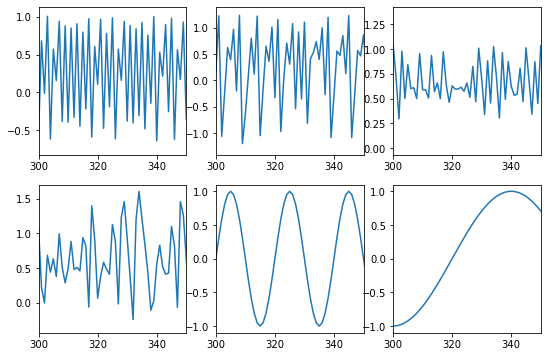

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(9, 6))
for i in range(6):
    ax[i//3, i%3].plot(range(N+1), train_traj[i, :])
    ax[i//3, i%3].set_xlim([300, 350])
plt.show()

In [9]:
df = pd.DataFrame(train_traj.transpose(), columns=['Henon 0.8', 'Henon 1.0', 'Ikeda 0.7', 'Ikeda 0.9', 'Sine 20', 'Sine 80'])
df.to_csv('all_traj_fixedpara_N500.csv')

In [8]:
# Construct Dataset using Pytorch Dataloader
import torch
from torch.utils.data import Dataset

class TimeseriesDataset(Dataset):
    def _init_(self, dataframe, sequence_length):
        self.sequence_length = sequence_length
        self.y = torch.tensor(dataframe)

SyntaxError: invalid syntax (547358480.py, line 8)